# 数据探索

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
from datetime import datetime, timedelta

## 载入数据

In [4]:
df = pd.read_excel('test_data.xls')

In [5]:
# 记录数量
len(df)

5881

In [6]:
# 显示所有字段名字
df.columns

Index([u'ship_name', u'ship_mobile', u'order_id', u'total_amount',
       u'final_amount', u'pay_status', u'ship_status', u'is_delivery',
       u'try_order', u'erp_order_id', u'erp_status', u'createtime',
       u'last_modified', u'payment', u'shipping_id', u'shipping', u'member_id',
       u'promotion_type', u'group_id', u'groupOn_id', u'is_leader',
       u'is_prepare', u'group_num', u'status', u'confirm_delivery', u'confirm',
       u'ship_area', u'weight', u'tostr', u'itemnum', u'ip', u'ship_addr',
       u'ship_zip', u'ship_tel', u'ship_email', u'ship_time', u'cost_item',
       u'is_tax', u'tax_type', u'cost_tax', u'is_protect', u'cost_protect',
       u'cost_payment', u'currency', u'cur_rate', u'advance', u'score_u',
       u'score_g', u'discount', u'pmt_goods', u'pmt_order', u'payed',
       u'disabled', u'displayonsite', u'mark_type', u'cost_freight', u'extend',
       u'order_refer', u'addon', u'source', u'city_link', u'verify_city_link',
       u'fuzzy', u'longitude', u'lat

In [7]:
# 字段数目
len(df.columns)

72

In [8]:
# 观察第一笔订单
df.ix[0]

ship_name                                                            姐客戶
ship_mobile                                                  16143836292
order_id                                                 170102235550041
total_amount                                                          34
final_amount                                                          34
pay_status                                                             1
ship_status                                                            1
is_delivery                                                            Y
try_order                                                          False
erp_order_id                                                           1
erp_status                                                          succ
createtime                                                    1483372544
last_modified                                                 1483855998
payment                                            

## 浏览所有字段

### ship_name

In [9]:
# 客户姓名
df.ship_name.map(lambda n: n[:1]).value_counts().head()

姐    453
生    160
士    144
敏     99
红     74
Name: ship_name, dtype: int64

- ship_name 可能是顾客名字的第三个字，前两个为X小姐、Y先生
- ship_name 与 ship_mobile 信息重复，可忽略

### ship_mobile

In [10]:
# 客户电话
len(df.ship_mobile.unique())

3790

- 共有 3790 个不同的电话号码

### order_id

In [11]:
# 订单编号
df.order_id.is_unique

True

- 订单编号没有重复

### total_amount，final_amount

In [12]:
# 订单金额
(df.total_amount == df.final_amount).all()

True

- total_amount 与 final_amount 信息重复
- 忽略 final_amount 其中一个

In [13]:
df.total_amount.describe()

count    5881.000000
mean      109.929809
std       146.618477
min         0.000000
25%        16.000000
50%        80.000000
75%       176.000000
max      5994.000000
Name: total_amount, dtype: float64

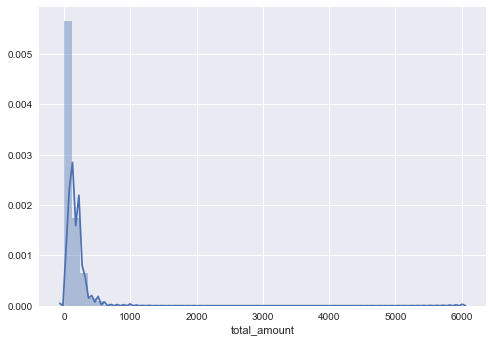

In [14]:
sns.distplot(df.total_amount)

### pay_status

In [15]:
# 付款状态
df.pay_status.value_counts()

1    4956
0     779
5     111
4      35
Name: pay_status, dtype: int64

- 有四种付款情形，大部分为方式1

### ship_status

In [16]:
# 出货状态
df.ship_status.value_counts()

1    4803
0    1078
Name: ship_status, dtype: int64

两种出货状态
- 大部分为 1
- 0 是自取吗？

### is_delivery

In [17]:
# 是否出货？
df.is_delivery.value_counts()

Y    5881
Name: is_delivery, dtype: int64

- 数值都为 Y
- 不具辨识度，忽略此字段

### try_order 

In [18]:
# 试单
df.try_order.value_counts()

False    5881
Name: try_order, dtype: int64

- 数值全为 False
- 不具辨识度，忽略此字段

### erp_order_id

In [19]:
# ERP订单编号
df.erp_order_id.value_counts()

1    5316
0     565
Name: erp_order_id, dtype: int64

### erp_status

In [20]:
# ERP状态
df.erp_status.value_counts()

succ      5068
normal     813
Name: erp_status, dtype: int64

### createtime

In [21]:
# 订单建立时间
df.createtime = df.createtime.map(datetime.fromtimestamp)
df.createtime.min(), df.createtime.max()

(Timestamp('2017-01-01 06:51:11'), Timestamp('2017-03-21 19:25:09'))

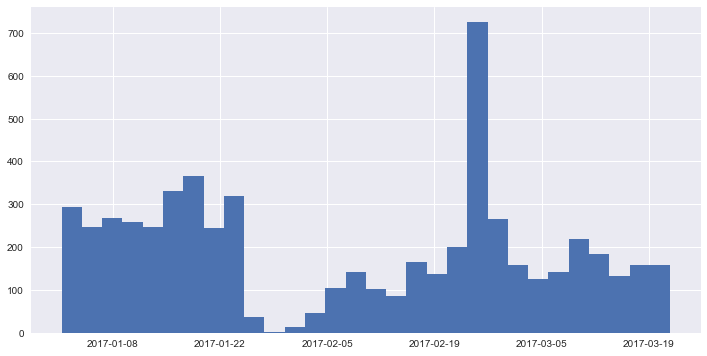

In [22]:
df.createtime.hist(bins=30, figsize=(12,6))

- 最旧的订单：'2017-01-01 06:51:11'
- 最新的订单：'2017-03-21 19:25:09'
- 春节期间（1/27~2/2）几乎没有订单
- 2/25 附近有一波订单，促销活动吗？

### last_modified

In [23]:
# 最后修改时间
df.last_modified = df.last_modified.map(datetime.fromtimestamp)
df.last_modified.min(), df.last_modified.max()

(Timestamp('2017-01-01 12:39:04'), Timestamp('2017-03-21 19:35:30'))

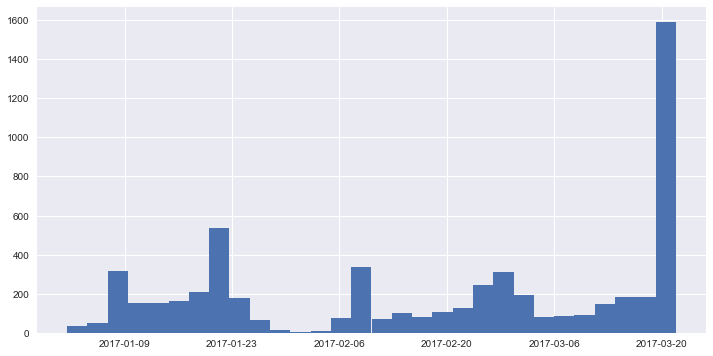

In [24]:
df.last_modified.hist(bins=30, figsize=(12,6))

- 最旧的改单：'2017-01-01 12:39:04'
- 最新的改单：'2017-03-21 19:35:30'
- 3/20 突然发生大量修改，发生什么事情？

### last_modified - createtimes 关系

In [25]:
duration = (df.last_modified - df.createtime).map(lambda delta: delta.days)
duration.describe()

count    5881.000000
mean       11.199116
std        15.771475
min         0.000000
25%         2.000000
50%         3.000000
75%        16.000000
max        78.000000
dtype: float64

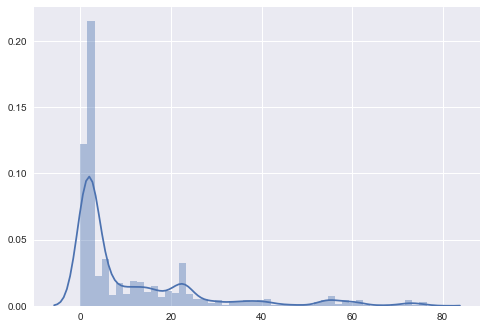

In [26]:
sns.distplot(duration)

- last_modified - createtimes 时间差很奇怪，平均11天多，最长78天

### payment

In [27]:
# 支付方式
df.payment.value_counts()

wxpayjsapi    3256
online         835
alipay         639
wxsmpay        564
-1             515
deposit         72
Name: payment, dtype: int64

- 大部分为微信支付
- “-1” 是什么情形？

### shipping_id

In [28]:
# 运送单位？
df.shipping_id.value_counts()

1    5881
Name: shipping_id, dtype: int64

- 数值全部为 1
- 不具辨识度，忽略此字段

### shipping

In [29]:
# 运送方式
df.shipping.value_counts()

冷链直供      4905
一米市集直送     976
Name: shipping, dtype: int64

两种运送方式
- 冷链直供：商品属性，肉品？高单价？客户付费？
- 一米市集直送

/Users/ruwang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pandas/core/internals.py:4606: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  result = op(a, b)
/Users/ruwang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pandas/core/missing.py:42: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  mask = arr == x


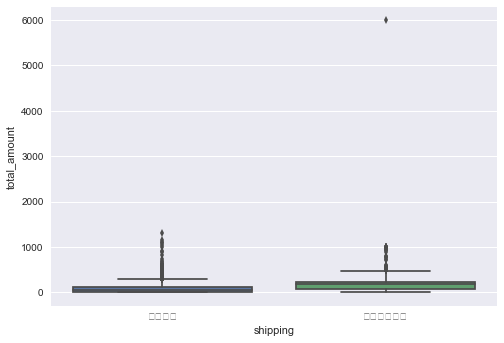

In [30]:
# 观察运送方式跟订单价格的关系
df.shipping.replace({'冷链直供': 0, '一米市集直送': 1}, inplace=True)
sns.boxplot(x='shipping', y='total_amount', data=df)

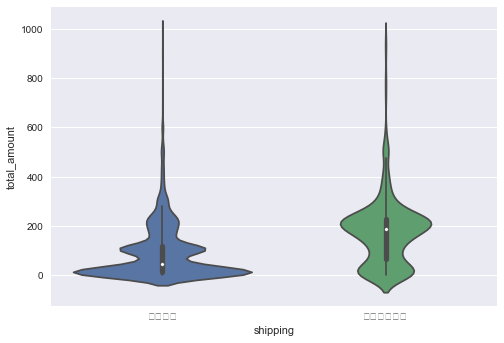

In [31]:
# 忽略 outlier
sns.violinplot(x='shipping', y='total_amount', data=df[df.total_amount < 1000])

- 运输方式跟订单价格关系不大

### member_id

In [32]:
# 判断 ship_mobile 与 member_id 是否一对一关系
members = df[['ship_mobile','member_id']].drop_duplicates()
members.ship_mobile.duplicated().any()

True

In [33]:
members.groupby('ship_mobile').member_id.count().sort_values()[-5:]

ship_mobile
16143651264    3
17015710353    3
16165837240    3
16165985610    3
17112128686    4
Name: member_id, dtype: int64

In [34]:
members.groupby('member_id').ship_mobile.count().sort_values()[-5:]

member_id
107911    2
88384     2
86235     2
90928     2
100459    3
Name: ship_mobile, dtype: int64

- 有一支手机门号注册多个会员的情形：新会员有优惠？注册系统允许？
- 有一个会员使用多个手机门号的情形：代订？送礼？

### promotion_type

In [35]:
# 促销类型
df.promotion_type.value_counts()

normal     5114
group       703
prepare      42
card         22
Name: promotion_type, dtype: int64

分为：正常、团购、预购、礼物卡（猜测）

### group_id

In [36]:
# 分组编号
groups = df.groupby('group_id')['ship_mobile'].unique().map(len).sort_values(ascending=False)
len(groups)

375

In [37]:
groups.head()

group_id
0                   3394
1702257995121197       4
1702258000845827       4
1702258027560606       4
1702247905571083       4
Name: ship_mobile, dtype: int64

- 总共 375 个分组
- 最多的 group_id=0，3394个会员

In [38]:
# groupid 不为 0 的前五笔订单
other_groups = df[df.group_id != 0]
other_groups.head()

,ship_name,ship_mobile,order_id,total_amount,final_amount,pay_status,ship_status,is_delivery,try_order,erp_order_id,...,fuzzy,longitude,latitude,scalping,out_trade_no,autoSendErp,autoSendErpStatus,string_tag_id,lang,delivery_note_price
49,韵客戶,16165932641,170223222858570,109.0,109.0,1,1,Y,False,1,...,0,121.449223,31.271176,False,17022322285857080738,True,1,NaN,simplified_chinese,display
72,红客戶,16143545425,170222203645822,109.0,109.0,1,1,Y,False,1,...,0,121.376013,31.165447,False,17022220364582253518,True,1,NaN,simplified_chinese,display
73,红客戶,16143545425,170222210177262,109.0,109.0,1,1,Y,False,1,...,0,121.589999,31.205951,False,17022221017726249493,True,1,NaN,simplified_chinese,display
255,慧客戶,16087220425,170223213654478,109.0,109.0,1,1,Y,False,1,...,0,NaN,NaN,False,17022321365447844006,True,1,NaN,simplified_chinese,display
256,慧客戶,16087220425,170226102100615,109.0,109.0,1,1,Y,False,1,...,0,121.568156,31.234188,False,17022610210061535330,True,1,NaN,simplified_chinese,display


In [39]:
other_groups.total_amount.value_counts()

109.00    664
0.01       10
Name: total_amount, dtype: int64

- 不清楚怎么划分 group 的
- and，找到两个神秘的消费金额 109 跟 0.01

### groupOn_id

In [40]:
# 团购编号
df.groupOn_id.value_counts()

0           5178
44930407     436
45392678     255
71845949       5
62071368       3
26225378       1
69258047       1
30016813       1
54615095       1
Name: groupOn_id, dtype: int64

In [41]:
df[df.groupOn_id == 44930407].head()

,ship_name,ship_mobile,order_id,total_amount,final_amount,pay_status,ship_status,is_delivery,try_order,erp_order_id,...,fuzzy,longitude,latitude,scalping,out_trade_no,autoSendErp,autoSendErpStatus,string_tag_id,lang,delivery_note_price
49,韵客戶,16165932641,170223222858570,109.0,109.0,1,1,Y,False,1,...,0,121.449223,31.271176,False,17022322285857080738,True,1,NaN,simplified_chinese,display
72,红客戶,16143545425,170222203645822,109.0,109.0,1,1,Y,False,1,...,0,121.376013,31.165447,False,17022220364582253518,True,1,NaN,simplified_chinese,display
256,慧客戶,16087220425,170226102100615,109.0,109.0,1,1,Y,False,1,...,0,121.568156,31.234188,False,17022610210061535330,True,1,NaN,simplified_chinese,display
460,蕾客戶,16068834941,170223212450614,109.0,109.0,1,1,Y,False,1,...,0,121.566394,31.229549,False,17022321245061438334,True,1,NaN,simplified_chinese,display
595,婕客戶,16956942662,170224141049669,109.0,109.0,1,1,Y,False,1,...,0,121.326393,31.152392,False,17022414104966943145,True,1,NaN,simplified_chinese,display


In [42]:
df[df.groupOn_id == 71845949].head()

,ship_name,ship_mobile,order_id,total_amount,final_amount,pay_status,ship_status,is_delivery,try_order,erp_order_id,...,fuzzy,longitude,latitude,scalping,out_trade_no,autoSendErp,autoSendErpStatus,string_tag_id,lang,delivery_note_price
5776,试客戶,16131902304,170321131884200,0.01,0.01,0,0,Y,False,1,...,0,121.361239,31.224165,False,NaN,True,0,NaN,simplified_chinese,display
5872,试客戶,16143578853,170321174832520,0.01,0.01,5,0,Y,False,1,...,1,121.496072,31.227203,False,17032117483252095984,True,0,NaN,simplified_chinese,display
5877,试客戶,16131902304,170321174148126,0.01,0.01,5,0,Y,False,1,...,0,121.361239,31.224165,False,17032117414812604340,True,0,NaN,simplified_chinese,display
5878,试客戶,16131902304,170321181781984,0.01,0.01,5,0,Y,False,1,...,0,121.361239,31.224165,False,17032118178198482615,True,0,NaN,simplified_chinese,display
5879,试客戶,16131902304,170321184552421,0.01,0.01,1,0,Y,False,1,...,0,121.361239,31.224165,False,17032118455242145306,True,0,NaN,simplified_chinese,display


In [43]:
df[df.groupOn_id != 0].total_amount.value_counts()

109.00    691
0.01       12
Name: total_amount, dtype: int64

- 109 跟 0.01 应该是两种团购的价格
- 0.01 for 测试？

### 观察 total_amount=0.01 的客户

In [44]:
df2 = df[df.total_amount == 0.01]

In [45]:
# 手机号码
df2.ship_mobile.value_counts()

16131902304    4
16143578853    3
16137410582    2
17015710353    2
16165875673    1
Name: ship_mobile, dtype: int64

In [46]:
# 订单时间
df2.createtime

1210   2017-02-22 12:29:06
1211   2017-02-22 12:55:48
2844   2017-02-20 11:19:29
4205   2017-02-21 17:44:33
5776   2017-03-21 13:18:42
5870   2017-03-21 17:22:22
5871   2017-03-21 17:28:57
5872   2017-03-21 17:48:41
5876   2017-03-21 17:29:16
5877   2017-03-21 17:41:51
5878   2017-03-21 18:17:47
5879   2017-03-21 18:45:55
Name: createtime, dtype: datetime64[ns]

In [47]:
# 分组编号
df2.group_id.value_counts()

0                   2
1703210089284855    1
1703210088491626    1
1703210093130994    1
1702217670290543    1
1703210089698798    1
1703210088510111    1
1703210088121825    1
1703210091445287    1
1702227739098903    1
1702227737712276    1
Name: group_id, dtype: int64

In [48]:
# 团购编号
df2.groupOn_id.value_counts()

71845949    5
62071368    3
69258047    1
30016813    1
54615095    1
26225378    1
Name: groupOn_id, dtype: int64

### is_leader

In [49]:
# 是否为带路货？
df.is_leader.value_counts()

0    5568
1     313
Name: is_leader, dtype: int64

In [50]:
# is_leader vs total_amount
df[df.is_leader == 1].total_amount.value_counts()

109.00    303
0.01       10
Name: total_amount, dtype: int64

### is_prepare

In [51]:
df.is_prepare.value_counts()

0    5881
Name: is_prepare, dtype: int64

- 数值全为 0
- 不具辨识度，忽略此字段

### group_num

In [52]:
df.group_num.value_counts()

0    5568
3     313
Name: group_num, dtype: int64

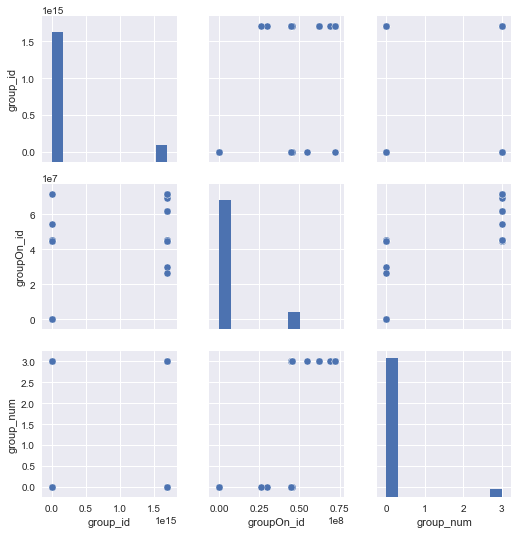

In [53]:
sns.pairplot(df, vars=['group_id', 'groupOn_id', 'group_num'])

- 看不出规律，三者数值范围太大，需要重新编码

### status

In [54]:
# 订单状态？
df.status.value_counts()

finish      4696
dead         796
active       388
pendding       1
Name: status, dtype: int64

### confirm_delivery

In [55]:
# 确认交付
df.confirm_delivery.value_counts()

Y    4530
N    1351
Name: confirm_delivery, dtype: int64

### confirm

In [56]:
# 确认什么？
df.confirm.value_counts()

N    5881
Name: confirm, dtype: int64

- 额... 全部都没有确认
- 不具辨识度，忽略此字段

### ship_area

In [57]:
# 出货地区
df.ship_area.value_counts()

mainland:上海/上海市/浦东新区:35                    1372
mainland:上海/上海市/长宁区:26                      572
mainland:上海/上海市/徐汇区:25                      567
mainland:上海/上海市/闵行区:36                      561
mainland:上海/上海市/普陀区:28                      460
mainland:上海/上海市/黄浦区:23                      365
mainland:上海/上海市/宝山区:37                      365
mainland:上海/上海市/杨浦区:31                      351
mainland:上海/上海市/静安区:27                      316
mainland:上海/上海市/虹口区:30                      214
mainland:上海/上海市/闸北区:29                      189
mainland:上海/上海市/嘉定区:38                      142
mainland:上海/上海市/松江区:41                      139
mainland:上海/上海市/青浦区:40                      110
mainland:上海/上海市/卢湾区:24                       91
mainland:上海/上海市/金山区:44                       13
mainland:上海/上海市/奉贤区:39                       11
mainland:Shanghai/Shanghai/Jingan:27          9
mainland:Shanghai/Shanghai/Xuhui:25           8
mainland:Shanghai/Shanghai/Changning:26       7
mainland:上海/上海市/南汇区:42                  

- 出货地区有中文、英文
- 可以抽取 area code

In [58]:
# 改写 ship_area
df.ship_area = df.ship_area.map(lambda area: int(area.split(':')[-1]))
df.ship_area.value_counts()

35    1373
26     579
25     575
36     561
28     460
23     368
37     365
31     351
27     325
30     215
29     192
41     142
38     142
40     110
24      91
44      13
39      11
42       4
46       3
48       1
Name: ship_area, dtype: int64

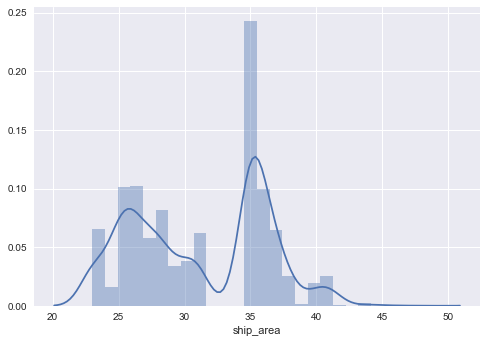

In [59]:
sns.distplot(df.ship_area)

### weight

In [60]:
# 重量
df.weight.describe()

count     5881.000000
mean      1233.710593
std       1404.636672
min          0.000000
25%        231.000000
50%        801.000000
75%       1535.000000
max      16377.000000
Name: weight, dtype: float64

- 平均 1233.710593 （公克吗？）
- 最轻 0 （空气？）
- 最重 16377

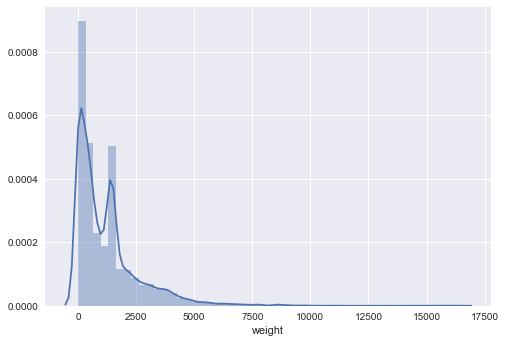

In [61]:
sns.distplot(df.weight)

### tostr

In [62]:
df.tostr.value_counts()

订单明细介绍    5832
订单名称介绍      15
Name: tostr, dtype: int64

- 先忽略

### itemnum

In [63]:
# 商品数量
df.itemnum.describe()

count    5881.000000
mean        4.071246
std         4.198784
min         0.000000
25%         1.000000
50%         2.000000
75%         6.000000
max        37.000000
Name: itemnum, dtype: float64

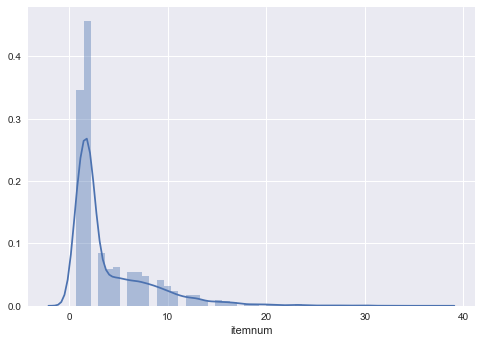

In [64]:
sns.distplot(df.itemnum)

### 观察 weight vs itemnum

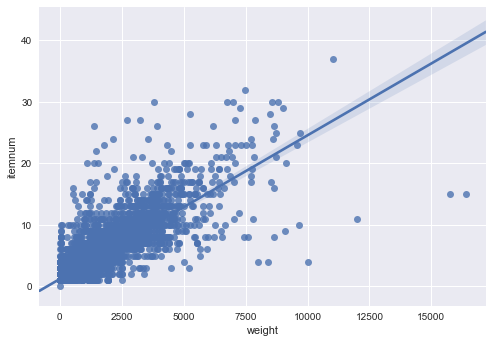

In [65]:
sns.regplot(x='weight', y='itemnum', data=df)

### ip

In [66]:
df.ip.value_counts().head(10)

139.196.30.225     4258
101.200.101.208     363
123.57.117.83       112
116.228.216.18      106
120.27.173.213       36
218.56.32.164        14
116.237.20.40        11
101.200.101.202       9
61.171.64.63          8
218.81.94.237         7
Name: ip, dtype: int64

```
WHOIS Results for：139.196.30.225
% [whois.apnic.net]
% Whois data copyright terms http://www.apnic.net/db/dbcopyright.html

% Information related to \'139.196.0.0 - 139.196.255.255\'

inetnum: 139.196.0.0 - 139.196.255.255
netname: ALISOFT
descr: Aliyun Computing Co., LTD
descr: 5F, Builing D, the West Lake International Plaza of S&T
descr: No.391 Wen\'er Road, Hangzhou, Zhejiang, China, 310099
country: CN
admin-c: ZM1015-AP
tech-c: ZM877-AP
tech-c: ZM876-AP
tech-c: ZM875-AP
mnt-by: MAINT-CNNIC-AP
mnt-irt: IRT-CNNIC-CN
status: ALLOCATED PORTABLE
changed: ipas@cnnic.cn 20140730
source: APNIC
```
主要订单都来自阿里(员工)?

### ship_addr

In [67]:
# 出货地址
df.ship_addr.value_counts().head()

上海上海市长宁区芙蓉江路388弄20号301     23
上海上海市浦东新区东陆路429弄21号702     21
上海上海市闵行区古龙路287弄77号101      13
上海上海市杨浦区政和路999弄22号401室     13
上海上海市长宁区芙蓉江路388弄16号1001    12
Name: ship_addr, dtype: int64

### ship_zip

In [68]:
# 邮递区号
df.ship_zip.fillna(0).value_counts()

200001.0    3828
0.0         2053
Name: ship_zip, dtype: int64

- 部分没写，其余都是 200001（上海市辖区黄浦区）
- 不具辨识度，忽略此字段

### ship_tel

In [69]:
# 客户市话？
df.ship_tel.fillna(0).value_counts().head()

0              5761
13472667545       3
18917577319       3
13301816996       3
13761086123       3
Name: ship_tel, dtype: int64

In [70]:
df[df.ship_tel == '13472667545']

,ship_name,ship_mobile,order_id,total_amount,final_amount,pay_status,ship_status,is_delivery,try_order,erp_order_id,...,fuzzy,longitude,latitude,scalping,out_trade_no,autoSendErp,autoSendErpStatus,string_tag_id,lang,delivery_note_price
5717,青客戶,16066609777,170315081329807,79.0,79.0,1,0,Y,False,1,...,0,121.467531,31.185439,False,17031508132980747405,True,1,NaN,simplified_chinese,display
5718,青客戶,16066609777,170315174338528,62.0,62.0,1,1,Y,False,1,...,0,121.467531,31.185439,False,17031517433852859308,True,1,NaN,simplified_chinese,display
5719,青客戶,16066609777,170315233813201,172.0,172.0,1,1,Y,False,1,...,0,121.467531,31.185439,False,17031523381320191512,True,1,NaN,simplified_chinese,display


- 大多数没写
- ship_tel 不等于 ship_mobile
- 以 ship_mobile 区别客户，忽略此字段

### ship_email

In [71]:
# 客户邮箱？
df.ship_email.fillna('?').value_counts()

?    5881
Name: ship_email, dtype: int64

- 全部为空
- 不具辨识度，忽略此字段

### ship_time

In [72]:
# 出货时间
df.ship_time.fillna('??,??').map(lambda x: x.split(',')[1]).value_counts()

全天             1501
14:00-21:00    1429
08:00-12:00    1319
14:00-18:00     863
18:00-21:00     580
??              146
2017-02-11        7
2017-03-18        6
2017-01-14        6
2017-02-25        5
2017-03-11        4
2017-03-04        4
2017-02-17        3
2017-01-07        2
2017-01-21        2
8:00-12:00        2
2017-03-25        1
All day           1
Name: ship_time, dtype: int64

- 全天：1501
- 上午：1319
- 下午：863
- 晚上：580
- 下午以后：1429
- 有部分无效数据、有部分指定日期
- 数据还需要进一步整理

### cost_item

In [73]:
# 商品成本？
df.cost_item.value_counts().head(10)

109.0    697
75.0     220
158.0    101
93.0      98
87.0      95
69.0      85
78.5      82
90.0      79
72.0      73
84.0      61
Name: cost_item, dtype: int64

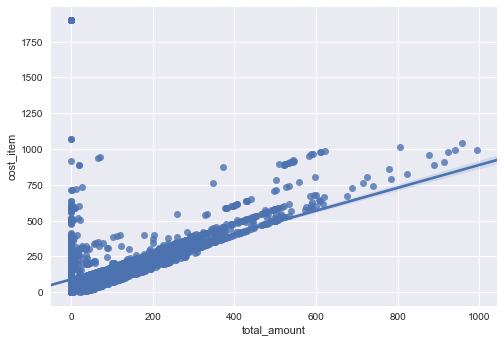

In [74]:
sns.regplot(x='total_amount', y='cost_item', data=df[df.total_amount < 1000])

In [75]:
df[df.cost_item > 1500].groupby(['cost_item','total_amount'])['order_id'].count().unstack()

total_amount,0.0,5994.0
cost_item,,
1899.0,29.0,NaN
6074.0,NaN,1.0


- 看到这样的对应关系，我也是醉了

### is_tax

In [76]:
# 含税？
df.is_tax.value_counts()

False    5302
True      579
Name: is_tax, dtype: int64

### tax_type

In [77]:
# 税别
df.tax_type.value_counts()

false       5271
company      407
personal     172
Name: tax_type, dtype: int64

### cost_tax

In [78]:
# 成本税？
df.cost_tax.value_counts()

0.0    5881
Name: cost_tax, dtype: int64

- 数值全部为 0
- 不具辨识度，忽略此字段

### is_protect

In [79]:
df.is_protect.value_counts()

False    5881
Name: is_protect, dtype: int64

- 数值全部为 False
- 不具辨识度，忽略此字段

### cost_protect

In [80]:
df.cost_protect.value_counts()

0.0    5881
Name: cost_protect, dtype: int64

- 数值全部为 0
- 不具辨识度，忽略此字段

### cost_payment

In [81]:
df.cost_payment.value_counts()

0.0    5164
Name: cost_payment, dtype: int64

- 数值全部为 0
- 不具辨识度，忽略此字段

### currency

In [82]:
# 货币
df.currency.value_counts()

CNY    5881
Name: currency, dtype: int64

- 数值全部为 CNY (目前业务还在中国境内)
- 不具辨识度，忽略此字段

### cur_rate

In [83]:
# 汇率
df.cur_rate.value_counts()

1.0    5881
Name: cur_rate, dtype: int64

- 数值全部为 1.0 (目前业务还在中国境内)
- 不具辨识度，忽略此字段

### advance

In [84]:
df.advance.value_counts().head()

0.0      5591
200.0      41
500.0      27
199.0       5
100.0       4
Name: advance, dtype: int64

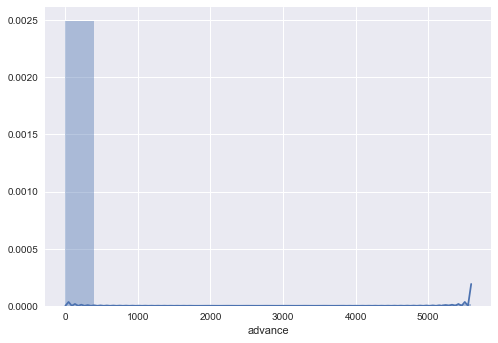

In [85]:
sns.distplot(df.advance.value_counts())

### score_u

In [86]:
df.score_u.value_counts().head()

0.0      4041
200.0    1439
400.0      93
100.0       5
236.0       4
Name: score_u, dtype: int64

### score_g

In [87]:
df.score_g.value_counts().head()

0.0      969
18.0     120
3.0      109
15.0     108
158.0    103
Name: score_g, dtype: int64

### 观察 score_u 与 score_g 的关系

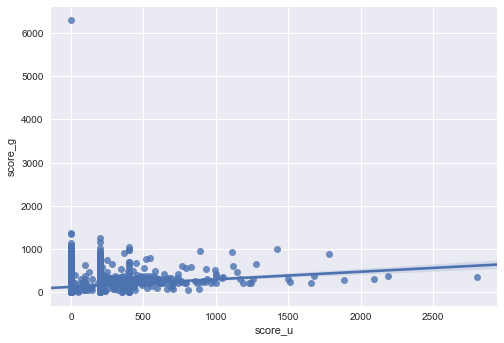

In [88]:
sns.regplot(x='score_u', y='score_g', data=df)

In [89]:
df[df.score_g > 6000][['total_amount', 'group_id', 'groupOn_id', 'score_u', 'score_g']]

,total_amount,group_id,groupOn_id,score_u,score_g
1726,5994.0,0,0,0.0,6294.0


In [90]:
df[df.score_u > 2500][['total_amount', 'group_id', 'groupOn_id', 'score_u', 'score_g']]

,total_amount,group_id,groupOn_id,score_u,score_g
1926,189.73,0,0,2802.0,348.0


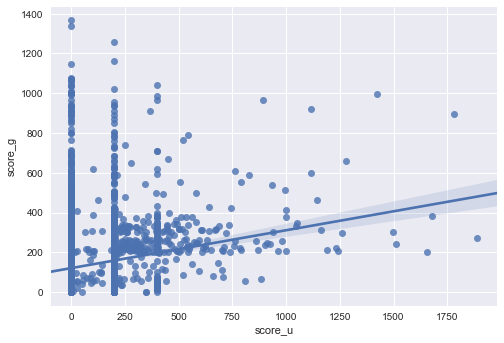

In [91]:
# 滤掉一些极大值
sns.regplot(x='score_u', y='score_g', data=df[(df.score_g < 2000) & (df.score_u < 2000)])

- 根据 客户、群组、消费金额 打分数吗？

### discount

In [92]:
# 折扣
df.discount.value_counts().head()

 0.0     5738
-30.0      14
-20.0       6
-56.0       6
-45.0       5
Name: discount, dtype: int64

In [93]:
# 把折扣转成正值
df.discount = np.abs(df.discount)

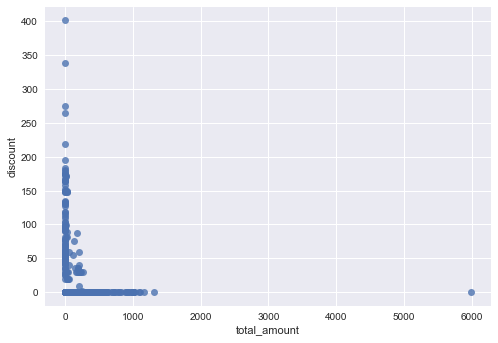

In [94]:
sns.regplot(x='total_amount', y='discount', data=df, fit_reg=False)

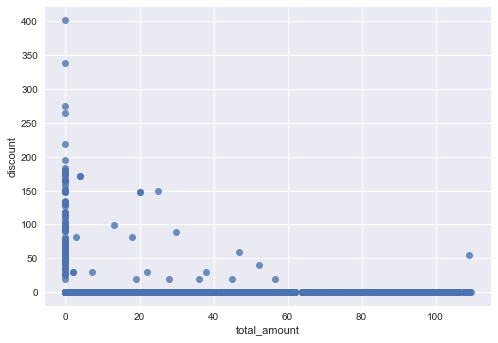

In [95]:
# total_amount 中位数以下的情形
sns.regplot(x='total_amount', y='discount', data=df[df.total_amount < 110], fit_reg=False)

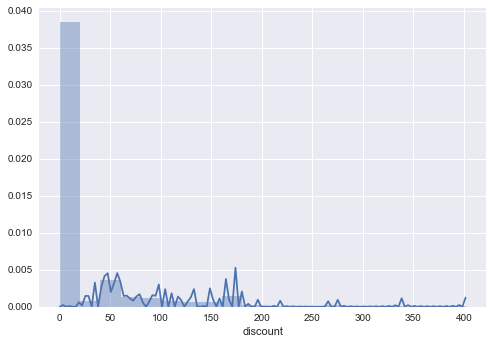

In [96]:
# 消费为0，折扣分布
sns.distplot(df[df['total_amount'] == 0]['discount'])

- 替买了快六千却没有折扣的客户不值啊（烟~）

### pmt_goods

In [97]:
df.pmt_goods.value_counts().head()

0.0     3934
2.5       51
10.0      43
6.0       30
5.4       27
Name: pmt_goods, dtype: int64

### pmt_order

In [98]:
df.pmt_order.value_counts().head()

75.0    1448
0.0      941
80.0     482
40.0     482
20.0     419
Name: pmt_order, dtype: int64

### payed

In [99]:
# 付费
df.payed.describe()

count    5881.000000
mean       91.397618
std       142.283887
min         0.000000
25%         3.500000
50%        29.000000
75%       150.500000
max      5994.000000
Name: payed, dtype: float64

In [100]:
# 订单金额减折扣 ！= 付款金额
((df.total_amount - df.discount) != (df.payed)).any()

True

In [101]:
dfx = df[(df.total_amount + df.discount) != (df.payed)]
dfx.payed.value_counts().head()

0.0      880
20.0       3
160.0      2
154.0      2
4.0        2
Name: payed, dtype: int64

- 印象中某些订单是货到付款，所以系统没有收费记录（不确定）

### disabled

In [102]:
df.disabled.value_counts()

False    5881
Name: disabled, dtype: int64

- 数值全部为 False
- 不具辨识度，忽略此字段

### displayonsite

In [103]:
df.displayonsite.value_counts()

True     5783
False      98
Name: displayonsite, dtype: int64

- 意义不明，忽略此字段

### mark_type

In [104]:
df.mark_type.value_counts()

b1    5881
Name: mark_type, dtype: int64

- 数值全部为 b1 （意义不明）
- 不具辨识度，忽略此字段

### cost_freight

In [105]:
# 运费
df.cost_freight.value_counts()

0.0     4730
20.0     754
30.0     397
Name: cost_freight, dtype: int64

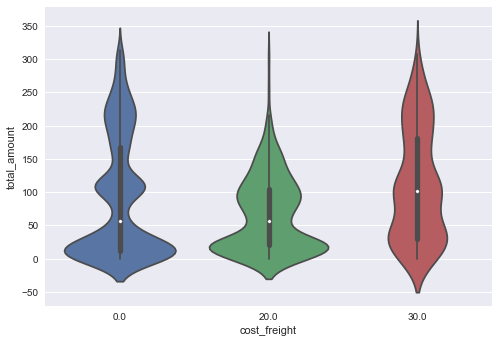

In [132]:
# cost_freight vs total_amount
sns.violinplot(x='cost_freight', y='total_amount', data=df[df.total_amount < df.total_amount.quantile(.95)])

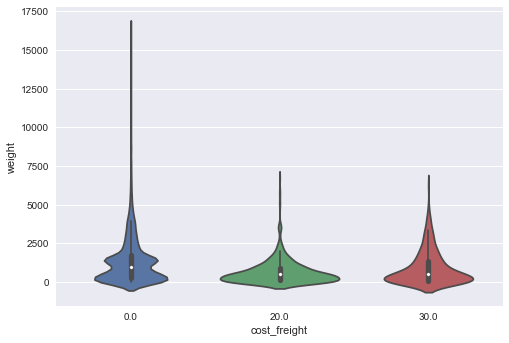

In [131]:
# cost_freight vs weight
sns.violinplot(x='cost_freight', y='weight', data=df[df.total_amount < df.weight.quantile(.95)])

- 目前看不出，收取运费的规则

### extend

In [107]:
df.extend.value_counts()

False    5881
Name: extend, dtype: int64

- 数值全部为 False （意义不明）
- 不具辨识度，忽略此字段

### order_refer

In [108]:
# 推荐订单？
df.order_refer.value_counts()

local    5881
Name: order_refer, dtype: int64

- 数值全部为 local （AARRR还没玩到Refer这阶段？）
- 不具辨识度，忽略此字段

### addon

In [109]:
df.addon.value_counts().head()

a:2:{s:19:"order_chgpointmoney";s:4:"2.00";s:19:"order_chgpointscore";d:200;}         1216
a:2:{s:19:"order_chgpointmoney";s:4:"0.00";s:19:"order_chgpointscore";s:1:"0";}        359
a:2:{s:19:"order_chgpointmoney";s:5:"0.000";s:19:"order_chgpointscore";s:1:"0";}       164
a:2:{s:19:"order_chgpointmoney";s:4:"2.00";s:19:"order_chgpointscore";s:3:"200";}      125
a:2:{s:19:"order_chgpointmoney";s:5:"2.000";s:19:"order_chgpointscore";s:3:"200";}      98
Name: addon, dtype: int64

- 额外加入的信息
- 将来如要分析，需要再清理、转换
- 因为缺乏信息结构的知识，忽略此字段

### source

In [110]:
# 订单来源
df.source.value_counts()

weixin    3882
ios        968
pc         655
wap        376
Name: source, dtype: int64

订单来源
- 微信 （手机app?)
- iso
- pc
- wap （手机版网页）

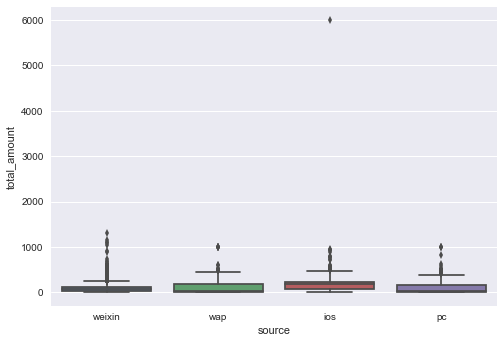

In [111]:
sns.boxplot(x='source', y='total_amount', data=df)

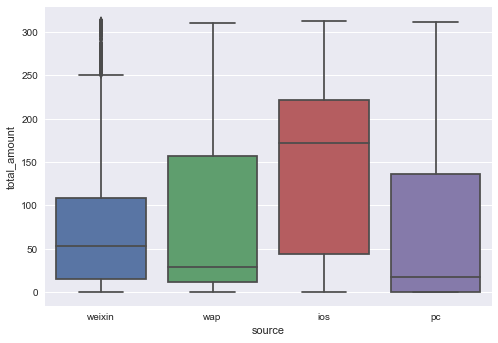

In [112]:
# 观察95%消费情形
sns.boxplot(x='source', y='total_amount', data=df[df.total_amount < df.total_amount.quantile(0.95)])

- 嗯，用 iPhone 的人消费能力较高

### city_link

In [113]:
df.city_link.value_counts()

0.0    4571
1.0     651
2.0     593
Name: city_link, dtype: int64

- 神秘的标记，先忽略此字段

### verify_city_link

In [114]:
df.verify_city_link.value_counts()

 0.0    3594
 1.0    1215
 2.0    1049
-1.0      17
Name: verify_city_link, dtype: int64

- 神秘的标记，先忽略此字段

### fuzzy

In [115]:
df.fuzzy.value_counts()

0    5737
1     144
Name: fuzzy, dtype: int64

- 神秘的标记，先忽略此字段

### longitude, latitude 经纬度

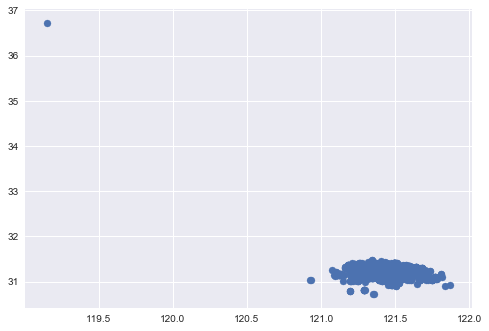

In [116]:
plt.scatter(df.longitude, df.latitude)

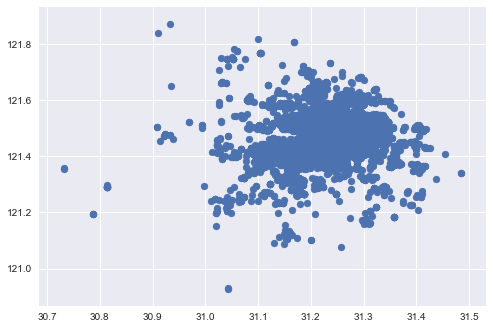

In [133]:
# 过滤奇异点
dfx = df[(df.latitude < 32) & (df.longitude > 120)]
plt.scatter(dfx.latitude, dfx.longitude)

### scalping (剥光?)

In [120]:
df.scalping.value_counts()

False    5804
True       77
Name: scalping, dtype: int64

### out_trade_no

In [141]:
# 交易流水号?
df.out_trade_no.fillna(0).value_counts().sort_values(ascending=False).head()

0                       615
17031121171209701084      1
17011518428856987355      1
17022404440901977153      1
17031315116783459209      1
Name: out_trade_no, dtype: int64

- 部分缺值，其余不重复
- 信息与 order_id 重复，忽略此字段

### autoSendErp

In [122]:
df.autoSendErp.value_counts()

True     5713
False     168
Name: autoSendErp, dtype: int64

### autoSendErpStatus

In [123]:
df.autoSendErpStatus.value_counts()

1    3623
0    2222
2      36
Name: autoSendErpStatus, dtype: int64

### string_tag_id

In [124]:
df.string_tag_id.value_counts().head()

a:0:{}                  18
a:1:{i:0;s:3:"347";}    12
a:1:{i:0;s:3:"170";}    11
a:1:{i:0;s:3:"204";}     5
a:1:{i:0;s:3:"228";}     3
Name: string_tag_id, dtype: int64

- 额外加入的信息
- 将来如要分析，需要再清理、转换
- 因为缺乏信息结构的知识，忽略此字段

### lang 语言

In [125]:
df.lang.value_counts()

simplified_chinese    5847
english                 34
Name: lang, dtype: int64

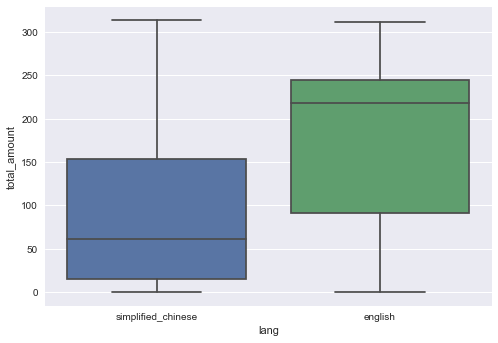

In [143]:
# lang vs total_amount
sns.boxplot(x='lang', y='total_amount', data=df[df.total_amount < df.total_amount.quantile(.95)])

- 老外消费力果然比较高

### delivery_note_price

In [144]:
# 送货时是否显示价钱
df.delivery_note_price.value_counts()

display    5530
none        351
Name: delivery_note_price, dtype: int64